In [2]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
import warnings 
from sklearn.metrics import classification_report, confusion_matrix 

warnings.filterwarnings('ignore')
%matplotlib inline 

In [3]:
path = 'https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/13_dropout_layer/sonar_dataset.csv'

df = pd.read_csv(path, header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
62,0.0086,0.0215,0.0242,0.0445,0.0667,0.0771,0.0499,0.0906,0.1229,0.1185,...,0.0072,0.0054,0.0022,0.0016,0.0029,0.0058,0.0050,0.0024,0.0030,R
60,0.0130,0.0006,0.0088,0.0456,0.0525,0.0778,0.0931,0.0941,0.1711,0.1483,...,0.0078,0.0041,0.0013,0.0011,0.0045,0.0039,0.0022,0.0023,0.0016,R
49,0.0119,0.0582,0.0623,0.0600,0.1397,0.1883,0.1422,0.1447,0.0487,0.0864,...,0.0025,0.0103,0.0074,0.0123,0.0069,0.0076,0.0073,0.0030,0.0138,R
136,0.1088,0.1278,0.0926,0.1234,0.1276,0.1731,0.1948,0.4262,0.6828,0.5761,...,0.0455,0.0213,0.0082,0.0124,0.0167,0.0103,0.0205,0.0178,0.0187,M
157,0.0201,0.0178,0.0274,0.0232,0.0724,0.0833,0.1232,0.1298,0.2085,0.2720,...,0.0131,0.0049,0.0104,0.0102,0.0092,0.0083,0.0020,0.0048,0.0036,M


<AxesSubplot:xlabel='60', ylabel='count'>

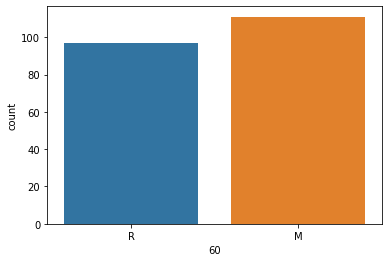

In [4]:
#COUNTPLOT FROM LABELS 
sns.countplot(df[60])

In [5]:
#PREPARE DATA AND SPLIT TRAIN AND TEST 
X, y = df.drop(60, axis=1), df[60]
y = pd.get_dummies(y, drop_first=True) #TRANSFORM R/M IN NUMERIC 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, 
                                                   stratify=y)
X_train.shape, X_test.shape

((166, 60), (42, 60))

In [8]:
#CREATE MODEL WITHOUT DROPOUT LAYER 
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7356 - accuracy: 0.4940
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.5602
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.6265
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.6807
Epoch 5/100
21/21 [==============================] - 0s 782us/step - loss: 0.6072 - accuracy: 0.7229
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7470
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5607 - accuracy: 0.7831
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5408 - accuracy: 0.7108
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.7771
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.8072
Epoch 1

Epoch 83/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9940
Epoch 84/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9940
Epoch 85/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9940
Epoch 86/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9880
Epoch 87/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9940
Epoch 88/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 1.0000
Epoch 89/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 1.0000
Epoch 90/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 1.0000
Epoch 91/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0344 - accuracy: 1.0000
Epoch 92/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 1.0000


In [9]:
#EVALUATE MODEL 
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 16ms/step - loss: 0.5711 - accuracy: 0.8333


[0.5711156725883484, 0.8333333134651184]

In [10]:
#PREDICT VALUES 
y_pred = model.predict(X_test).reshape(-1)
y_pred = np.round(y_pred) #ROUND VALUES TO 0 OR 1 

In [11]:
#PRINT CLASSIFICATION REPORT 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        22
           1       0.93      0.70      0.80        20

    accuracy                           0.83        42
   macro avg       0.86      0.83      0.83        42
weighted avg       0.85      0.83      0.83        42



In [16]:
#OK, NOW LET'S CREATE A MODEL WITH THE DROPOUT LAYER 
model_drop = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])
model_drop.compile(loss='binary_crossentropy', 
                    optimizer='adam', 
                    metrics='accuracy')
model_drop.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
21/21 [==============================] - 0s 781us/step - loss: 0.7109 - accuracy: 0.5422
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5723
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5241
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.5663
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.6145
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5964
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.5964
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.6084
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.5843
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.6627
Epoch 1

21/21 [==============================] - 0s 1ms/step - loss: 0.3020 - accuracy: 0.8675
Epoch 83/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2854 - accuracy: 0.8916
Epoch 84/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.8916
Epoch 85/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.8795
Epoch 86/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2573 - accuracy: 0.8916
Epoch 87/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2714 - accuracy: 0.8976
Epoch 88/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2485 - accuracy: 0.8976
Epoch 89/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.8855
Epoch 90/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.9277
Epoch 91/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2486 - accuracy: 0.8855
Epoch 92/100


In [17]:
model_drop.evaluate(X_test, y_test)

2/2 [==============================] - 0s 0s/step - loss: 0.4117 - accuracy: 0.7619


[0.4117213189601898, 0.761904776096344]

In [19]:
y_pred_drop = model_drop.predict(X_test).reshape(-1)
y_pred_drop = np.round(y_pred_drop)

print(classification_report(y_test, y_pred_drop))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        22
           1       0.81      0.65      0.72        20

    accuracy                           0.76        42
   macro avg       0.77      0.76      0.76        42
weighted avg       0.77      0.76      0.76        42

